In [1]:
import os
import sys
import glob
root_folder = os.path.dirname(os.getcwd())
sys.path.append(root_folder)
import pprint
import shutil
from ResoFit._utilities import Layer
from ResoFit.calibration import Calibration
from ResoFit.fitresonance import FitResonance

In [21]:
%matplotlib %notebook

In [2]:
# Global parameters
energy_min = 7
energy_max = 250
energy_step = 0.01

In [3]:
# Input sample name or names as str, case sensitive
layer_1 = 'Ag'
thickness_1 = 0.085
density_1 = None
layer_2 = 'I'
thickness_2 = 0.085
density_2 = None
layer = Layer()
layer.add_layer(layer=layer_1, thickness_mm=thickness_1, density_gcm3=density_1)
layer.add_layer(layer=layer_2, thickness_mm=thickness_2, density_gcm3=density_2)

In [9]:
folder = 'data/IPTS_19558/reso_data_19558'
data_file = 'spheres.csv'
spectra_file = 'Image002_Spectra.txt'

image_start = None  # Can be omitted or =None
image_end = None  # Can be omitted or =None
norm_to_file = None  # 'sphere_background_1.csv'
baseline = True
baseline_deg = 3
each_step = False
before = False
table = True
grid = True
peak = 'indexed'

norm_factor = 1

source_to_detector_m = 16.45  # 16#16.445359069030175#16.447496101100739
offset_us = 0

In [5]:
# Calibrate source_to_detector and/or delay
calibration = Calibration(data_file=data_file,
                          spectra_file=spectra_file,
                          raw_layer=layer,
                          energy_min=energy_min,
                          energy_max=energy_max,
                          energy_step=energy_step,
                          repeat=repeat,
                          folder=folder,
                          baseline=baseline)

calibration.norm_to(norm_to_file)
calibration.slice(slice_start=300, slice_end=image_end)

calibrate_result = calibration.calibrate(source_to_detector_m=source_to_detector_m,
                                         offset_us=offset_us,
                                         vary='all',
                                         each_step=each_step)
# calibration.find_peak()
calibration.index_peak(thres=0.13, min_dist=21)

+----------------- Calibration -----------------+
Params before:
Name                     Value      Min      Max   Stderr     Vary     Expr Brute_Step
offset_us                    0     -inf      inf     None     True     None     None
source_to_detector_m        16     -inf      inf     None     True     None     None
Params after:
Name                     Value      Min      Max   Stderr     Vary     Expr Brute_Step
offset_us                2.678     -inf      inf  0.03047     True     None     None
source_to_detector_m     16.43     -inf      inf 0.003344     True     None     None
Calibration chi^2 : 159.2538798623895



{'Gd': {'exp':             x         y  x_num       x_s
  0  208.772347  0.030893    191  0.000080
  1   22.361421  0.034954   1247  0.000248
  2   16.749601  0.038395   1491  0.000288, 'ideal':             x            y
  0  208.514035   253.621159
  1   22.304911  1129.983634
  2   16.770344  1083.706903},
 'U': {'exp':             x         y  x_num       x_s
  0  189.845784  0.063543    216  0.000084
  1  116.835069  0.049514    364  0.000107
  2  102.626086  0.104566    410  0.000115
  3   65.995038  0.112798    591  0.000144
  4   36.674044  0.248735    903  0.000193
  5   20.873104  0.277571   1302  0.000257,
  'ideal':             x             y
  0  189.685935   5187.744214
  1  116.910128   2003.924567
  2  102.568567   6022.958717
  3   66.033584   4356.430784
  4   36.684750  13337.612496
  5   20.872743   9801.184720}}

In [15]:
# Calibrate source_to_detector and/or delay
calibration = Calibration(data_file=data_file,
                          spectra_file=spectra_file,
                          layer=layer,
                          energy_min=energy_min,
                          energy_max=energy_max,
                          energy_step=energy_step,
                          folder=folder,
                          baseline=baseline,
                          baseline_deg=baseline_deg,
                          exp_source_to_detector_m=source_to_detector_m,
                          exp_offset_us=offset_us)

calibration.experiment.norm_to(norm_to_file, norm_factor=norm_factor)
calibration.experiment.slice(start=300, end=image_end)

calibrate_result = calibration.calibrate(source_to_detector_m=source_to_detector_m,
                                         offset_us=offset_us,
                                         vary='all',
                                         each_step=each_step)
# calibration.find_peak()
peak_indexed = calibration.index_peak(thres=0.13, min_dist=21)
pprint.pprint(peak_indexed)

+----------------- Calibration -----------------+
Params before:
Name                     Value      Min      Max   Stderr     Vary     Expr Brute_Step
offset_us                    0     -inf      inf     None     True     None     None
source_to_detector_m     16.45     -inf      inf     None     True     None     None

Params after:
Name                     Value      Min      Max   Stderr     Vary     Expr Brute_Step
offset_us              -0.4096     -inf      inf  0.02929     True     None     None
source_to_detector_m     16.19     -inf      inf 0.003191     True     None     None
Calibration chi^2 : 184.4786906326376



/Users/Shawn/anaconda3/envs/py37/lib/python3.7/site-packages/peakutils/peak.py:239: UserWarning:

At least 3 points required for Gaussian fitting



{'152-Gd': {'exp':            x         y  x_num  x_num_o       x_s       x_A
0  36.785444  0.257604    903     1203  0.000193  0.047152,
            'ideal':            x         y  x_num  x_num_o       x_s       x_A
0  36.861236  0.011505    903     1203  0.000193  0.047104},
 '153-Gd': {'exp': Empty DataFrame
Columns: [x, y, x_num, x_num_o, x_s, x_A]
Index: [],
            'ideal': Empty DataFrame
Columns: [x, y, x_num, x_num_o, x_s, x_A]
Index: []},
 '154-Gd': {'exp':            x         y  x_num  x_num_o       x_s       x_A
0  22.272937  0.036942   1247     1547  0.000248  0.060597,
            'ideal':            x         y  x_num  x_num_o       x_s       x_A
0  22.330647  0.039709   1247     1547  0.000248  0.060519},
 '155-Gd': {'exp': Empty DataFrame
Columns: [x, y, x_num, x_num_o, x_s, x_A]
Index: [],
            'ideal': Empty DataFrame
Columns: [x, y, x_num, x_num_o, x_s, x_A]
Index: []},
 '156-Gd': {'exp':             x         y  x_num  x_num_o       x_s       x_A
0  19

In [16]:
peak_indexed.keys()

dict_keys(['230-U', '231-U', '232-U', '233-U', '234-U', '235-U', '236-U', '237-U', '238-U', '239-U', '240-U', '241-U', 'U', '152-Gd', '153-Gd', '154-Gd', '155-Gd', '156-Gd', '157-Gd', '158-Gd', '160-Gd', 'Gd'])

In [17]:
peak_analyzed = calibration.analyze_peak()
pprint.pprint(peak_analyzed)

/Users/Shawn/anaconda3/envs/py37/lib/python3.7/site-packages/lmfit/models.py:34: FutureWarning:


The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.



+------------ Peak analysis ------------+
Lorentzian peak fitting:
  ele_name   center_val   fwhm_val
0       Gd   225.003193   1.015445
1       Gd   417.063735  12.251907
2       Gd   581.022887  22.374606
3        U   893.339934  17.082342
4       Gd  1237.000015   2.696296
5        U  1311.887770  18.939104

{'152-Gd': {'exp':            x         y  x_num  x_num_o       x_s       x_A
0  36.785444  0.257604    903     1203  0.000193  0.047152,
            'ideal':            x         y  x_num  x_num_o       x_s       x_A
0  36.861236  0.011505    903     1203  0.000193  0.047104,
            'peak_span': Empty DataFrame
Columns: [img_num, time_s, energy_ev, y]
Index: []},
 '153-Gd': {'exp': Empty DataFrame
Columns: [x, y, x_num, x_num_o, x_s, x_A]
Index: [],
            'ideal': Empty DataFrame
Columns: [x, y, x_num, x_num_o, x_s, x_A]
Index: [],
            'peak_span': Empty DataFrame
Columns: [img_num, time_s, energy_ev, y]
Index: []},
 '154-Gd': {'exp':            x         y  

In [6]:
calibration.analyze_peak()

+------------ Peak analysis ------------+
Gaussian fit:
  ele_name   center_val   fwhm_val
0       Gd   191.366532   3.445087
1        U   216.275181   2.830783
2        U   363.800895   3.708771
3        U   410.178536   3.711465
4        U   590.737448   4.391569
5        U   902.874327   7.373380
6       Gd  1249.063254   8.068452
7        U  1302.505382  11.590081
8       Gd  1489.458969  14.710723



{'Gd': {'exp':             x         y  x_num       x_s
  0  208.772347  0.030893    191  0.000080
  1   22.361421  0.034954   1247  0.000248
  2   16.749601  0.038395   1491  0.000288, 'ideal':             x            y
  0  208.514035   253.621159
  1   22.304911  1129.983634
  2   16.770344  1083.706903, 'peak_span':     img_num    time_s   energy_ev         y
  0       489  0.000079  210.407413  0.009062
  1       490  0.000079  209.587488  0.018400
  2       491  0.000080  208.772347  0.030893
  3       492  0.000080  207.961953  0.022086
  4       493  0.000080  207.156267  0.019742
  5       494  0.000080  206.355255  0.013376
  6      1545  0.000248   22.418512  0.021777
  7      1546  0.000248   22.389939  0.021475
  8      1547  0.000248   22.361421  0.034954
  9      1548  0.000249   22.332958  0.032253
  10     1549  0.000249   22.304549  0.033004
  11     1550  0.000249   22.276194  0.028108
  12     1551  0.000249   22.247893  0.030741
  13     1552  0.000249   22.219646

<IPython.core.display.Javascript object>


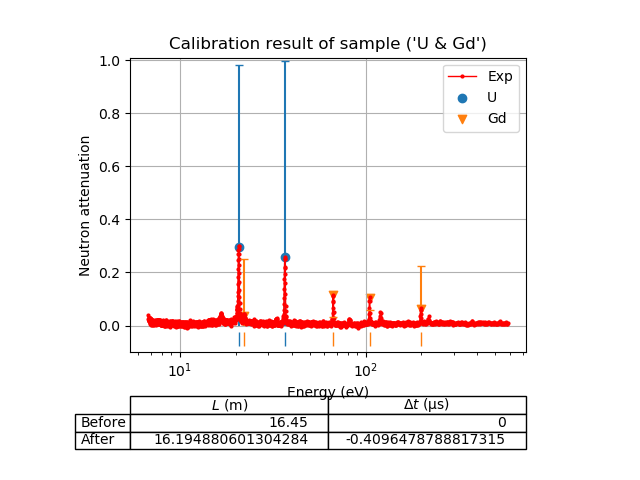

/Users/Shawn/Documents/GitHub/ResoFit/ResoFit/calibration.py:477: UserWarning:

Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations



In [23]:
calibration.plot(before=before, index_level='ele', table=table, grid=grid, interp=False)

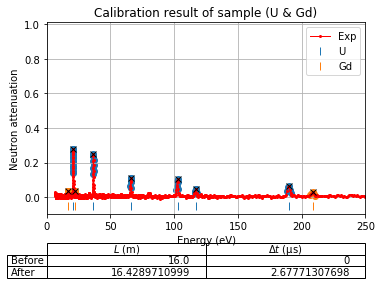

In [7]:
calibration.plot(before=before, table=table, peak=peak, grid=grid, items_to_plot=items_to_plot, interp=False)

In [8]:
calibration.experiment.o_peak.peak_map_indexed[layer_1]['peak_span']

,img_num,time_s,energy_ev,y
0,514,0.000083,191.263237,0.026607
1,515,0.000083,190.552534,0.041657
2,516,0.000084,189.845784,0.063543
3,517,0.000084,189.142959,0.056586
4,518,0.000084,188.444029,0.032784
5,661,0.000107,117.862584,0.020109
6,662,0.000107,117.518578,0.025623
7,663,0.000107,117.176076,0.046956
8,664,0.000107,116.835069,0.049514
9,665,0.000107,116.495549,0.033899


In [9]:
calibration.experiment.o_peak.peak_map_indexed[layer_2]['peak_span']

,img_num,time_s,energy_ev,y
0,489,0.000079,210.407413,0.009062
1,490,0.000079,209.587488,0.018400
2,491,0.000080,208.772347,0.030893
3,492,0.000080,207.961953,0.022086
4,493,0.000080,207.156267,0.019742
5,494,0.000080,206.355255,0.013376
6,1545,0.000248,22.418512,0.021777
7,1546,0.000248,22.389939,0.021475
8,1547,0.000248,22.361421,0.034954
9,1548,0.000249,22.332958,0.032253


In [12]:
def fill_zeros_to_num_str(num_str, tot_digits=5):
    while len(num_str)<tot_digits:
        num_str = '0' + num_str
    return num_str
    

In [17]:
# fill '0' to match digits of nume surffix
peak_map_indexed = calibration.experiment.o_peak.peak_map_indexed
img_num_str_dict = {}
for each_ele in peak_map_indexed.keys():
    img_num_str_dict[each_ele] = {}
    img_num = list(peak_map_indexed[each_ele]['peak_span']['img_num'])
    img_num_str_dict[each_ele]['num'] = [fill_zeros_to_num_str(num_str) for num_str in list(map(str, img_num))]
    img_num_str_dict[each_ele]['len'] = len(img_num_str_dict[each_ele]['num'])
pprint.pprint(img_num_str_dict)
    

{'Gd': {'len': 32,
        'num': ['00489',
                '00490',
                '00491',
                '00492',
                '00493',
                '00494',
                '01545',
                '01546',
                '01547',
                '01548',
                '01549',
                '01550',
                '01551',
                '01552',
                '01553',
                '01554',
                '01782',
                '01783',
                '01784',
                '01785',
                '01786',
                '01787',
                '01788',
                '01789',
                '01790',
                '01791',
                '01792',
                '01793',
                '01794',
                '01795',
                '01796',
                '01797']},
 'U': {'len': 46,
       'num': ['00514',
               '00515',
               '00516',
               '00517',
               '00518',
               '00661',
               '0

In [25]:
_list_files = glob.glob('/Users/y9z/Documents/Neutron_data/IPTS_19558/resonance_data/CT_runs/angles_redo/image10/*.fits')

In [26]:
_list_files

['/Users/y9z/Documents/Neutron_data/IPTS_19558/resonance_data/CT_runs/angles_redo/image10/Image010_00000.fits',
 '/Users/y9z/Documents/Neutron_data/IPTS_19558/resonance_data/CT_runs/angles_redo/image10/Image010_00001.fits',
 '/Users/y9z/Documents/Neutron_data/IPTS_19558/resonance_data/CT_runs/angles_redo/image10/Image010_00002.fits',
 '/Users/y9z/Documents/Neutron_data/IPTS_19558/resonance_data/CT_runs/angles_redo/image10/Image010_00003.fits',
 '/Users/y9z/Documents/Neutron_data/IPTS_19558/resonance_data/CT_runs/angles_redo/image10/Image010_00004.fits',
 '/Users/y9z/Documents/Neutron_data/IPTS_19558/resonance_data/CT_runs/angles_redo/image10/Image010_00005.fits',
 '/Users/y9z/Documents/Neutron_data/IPTS_19558/resonance_data/CT_runs/angles_redo/image10/Image010_00006.fits',
 '/Users/y9z/Documents/Neutron_data/IPTS_19558/resonance_data/CT_runs/angles_redo/image10/Image010_00007.fits',
 '/Users/y9z/Documents/Neutron_data/IPTS_19558/resonance_data/CT_runs/angles_redo/image10/Image010_00008

In [39]:
# find full name with img_num
loc_dict = {}
for ele in img_num_str_dict.keys():
    loc_dict[ele] = []
for _names in _list_files:
    _base_name = _names.split('.')[0]
    for _ele in img_num_str_dict.keys():
        if _base_name[-5:] in img_num_str_dict[_ele]['num']:
            loc_dict[_ele].append(_names)

In [1]:
out_main_dir = '/Users/y9z/Downloads/test/'

for ele in img_num_str_dict.keys():
    out_ele_dir = out_main_dir + ele
    if os.path.exists(out_ele_dir) is False:
        os.makedirs(out_ele_dir)
    img_num_str_dict[ele]['dir'] = out_ele_dir

assert os.path.isdir(dst_dir)

NameError: name 'img_num_str_dict' is not defined

In [46]:
pprint.pprint(img_num_str_dict)

{'Gd': {'dir': '/Users/y9z/Downloads/test/Gd',
        'len': 32,
        'num': ['00489',
                '00490',
                '00491',
                '00492',
                '00493',
                '00494',
                '01545',
                '01546',
                '01547',
                '01548',
                '01549',
                '01550',
                '01551',
                '01552',
                '01553',
                '01554',
                '01782',
                '01783',
                '01784',
                '01785',
                '01786',
                '01787',
                '01788',
                '01789',
                '01790',
                '01791',
                '01792',
                '01793',
                '01794',
                '01795',
                '01796',
                '01797']},
 'U': {'dir': '/Users/y9z/Downloads/test/U',
       'len': 46,
       'num': ['00514',
               '00515',
               '00516

In [49]:
for ele in img_num_str_dict.keys():
    for each in loc_dict[ele]:
        shutil.copy(src=each, dst=img_num_str_dict[ele]['dir'])